In [68]:
import numpy as np
from scipy import ndimage, misc
from scipy.optimize import curve_fit
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import axes3d
import matplotlib.backends.backend_pdf
from lmfit import Model
#%matplotlib inline


In [74]:
tune115=misc.imread('Tune115_07722018_viewer_D1542_001.tiff')
tune116=misc.imread('Tune116_07722018_viewer_D1542_001.tiff')
tune117=misc.imread('Tune117_07722018_viewer_D1542_001.tiff')
tune118=misc.imread('Tune118_07722018_viewer_D1542_001.tiff')
tune119=misc.imread('Tune119_07722018_viewer_D1542_001.tiff')
tune120=misc.imread('Tune120_07722018_viewer_D1542_001.tiff')
tune121=misc.imread('Tune121_07722018_viewer_D1542_001.tiff')
tune122=misc.imread('Tune122_07722018_viewer_D1542_001.tiff')
tune123=misc.imread('Tune123_07722018_viewer_D1542_001.tiff')
tune124=misc.imread('Tune124_07722018_viewer_D1542_001.tiff')
tune125=misc.imread('Tune125_07722018_viewer_D1542_001.tiff')
tune126=misc.imread('Tune126_07722018_viewer_D1542_001.tiff')
tune127=misc.imread('Tune127_07722018_viewer_D1542_001.tiff')
tune128=misc.imread('Tune128_07722018_viewer_D1542_001.tiff')
tune129=misc.imread('Tune129_07722018_viewer_D1542_001.tiff')
tune130=misc.imread('Tune130_07722018_viewer_D1542_001.tiff')
tune131=misc.imread('Tune131_07722018_viewer_D1542_001.tiff')
tune132=misc.imread('Tune132_07722018_viewer_D1542_001.tiff')
tune133=misc.imread('Tune133_07722018_viewer_D1542_001.tiff')
tune134=misc.imread('Tune134_07722018_viewer_D1542_001.tiff')


bg=misc.imread('Tune114_background_003.tiff') #background image
light2=misc.imread('light_on_07722018_viewer_D1542_001.tiff') #image of viewer with light on
n=[tune134,tune115,tune116,tune117,tune118,tune119,tune120,tune121,tune122,tune123,tune124,tune125,tune126,tune127,tune128,tune129,tune130,tune131,tune132,tune133]
nn=[134,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133]


In [75]:
 def double_gaussian( x, c1, mu1,offset):
        sigma1=2.6
        sigma2=5.6
        res =   c1 * np.exp( - (x - mu1)**2.0 / (2.0 * sigma1**2.0) ) \
              + c1*1.18245 * np.exp( - (x - (mu1+4.9))**2.0 / (2.0 * sigma2**2.0) ) + offset
        return res

In [ ]:
#seaborn test
#data = pd.DataFrame(im[0])
#with sns.axes_style('white'):
#    sns.jointplot(x, data, kind='reg')

134
Pixel  309  is at  51.8083363408 % of data
115
Pixel  308  is at  48.4426889047 % of data
116
Pixel  308  is at  47.2101430226 % of data
Pixel  309  is at  54.2874142451 % of data
117
Pixel  306  is at  45.7906040412 % of data
Pixel  307  is at  52.998376223 % of data
118
Pixel  306  is at  46.0517809287 % of data
Pixel  307  is at  53.2358501388 % of data
119
Pixel  305  is at  50.8326776056 % of data
120
Pixel  304  is at  45.1155260181 % of data
Pixel  305  is at  52.3837703175 % of data
121
Pixel  304  is at  48.2435363788 % of data
122
Pixel  304  is at  51.4665382296 % of data
123
Pixel  302  is at  49.8589077103 % of data
124
Pixel  301  is at  45.1418857519 % of data
Pixel  302  is at  52.4077940595 % of data
125
Pixel  301  is at  49.0900529367 % of data
126
Pixel  300  is at  48.642675112 % of data
127
Pixel  299  is at  47.6630427079 % of data
Pixel  300  is at  54.6977932608 % of data
128
Pixel  298  is at  46.6842028309 % of data
Pixel  299  is at  53.8103252846 % of d

/home/sara/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Pixel  295  is at  48.0135672588 % of data


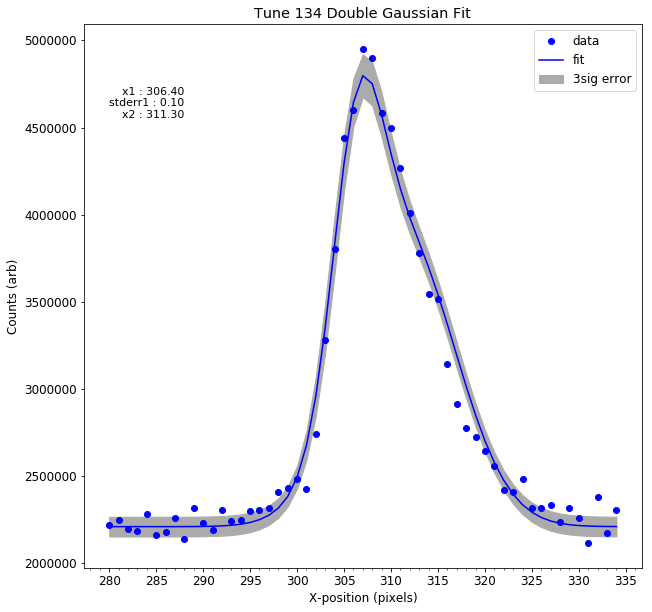

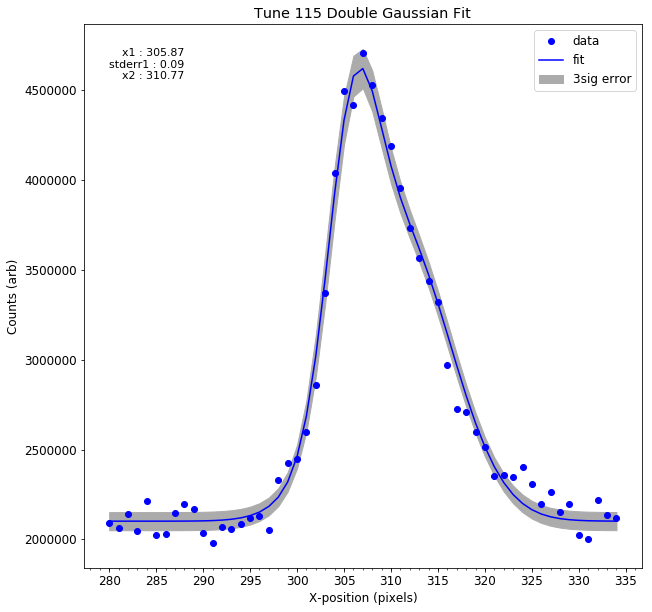

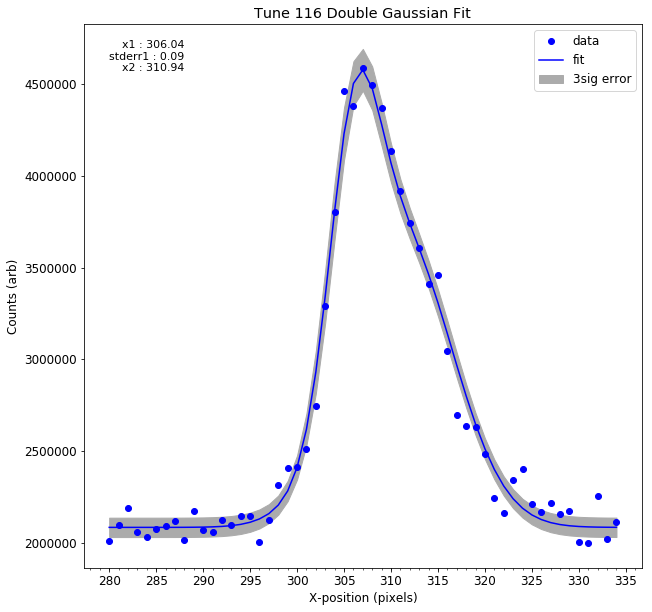

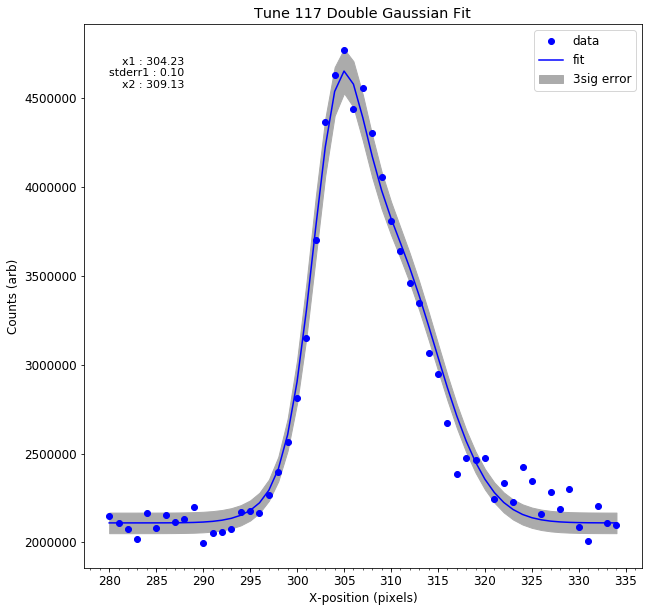

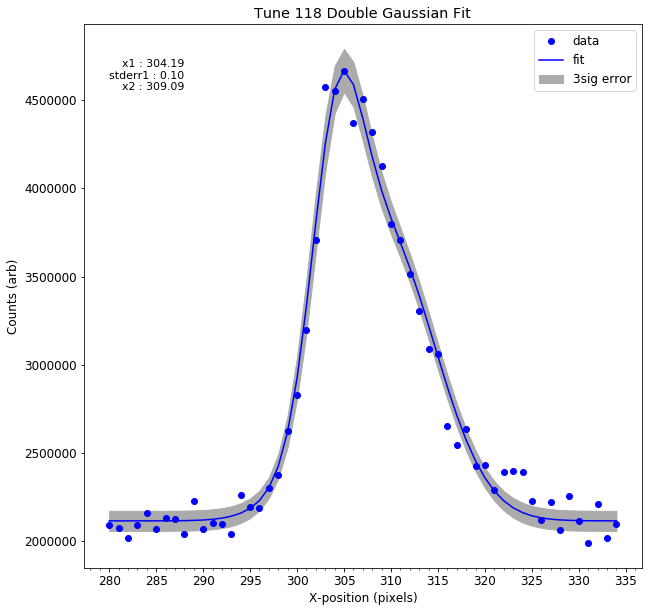

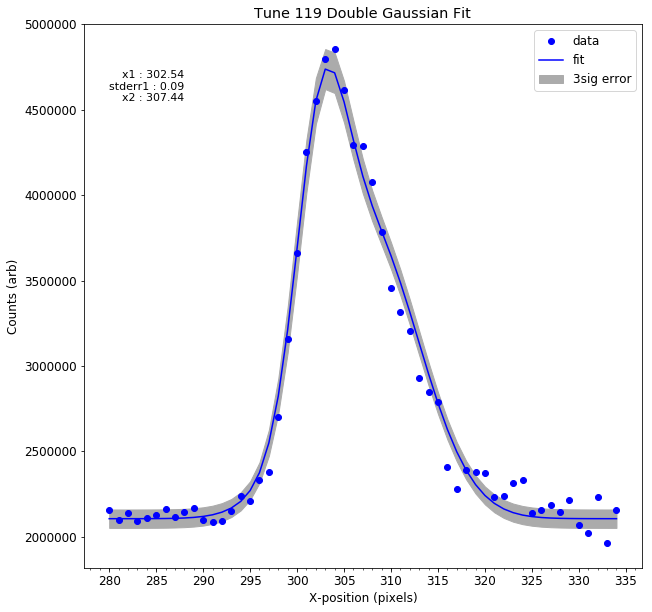

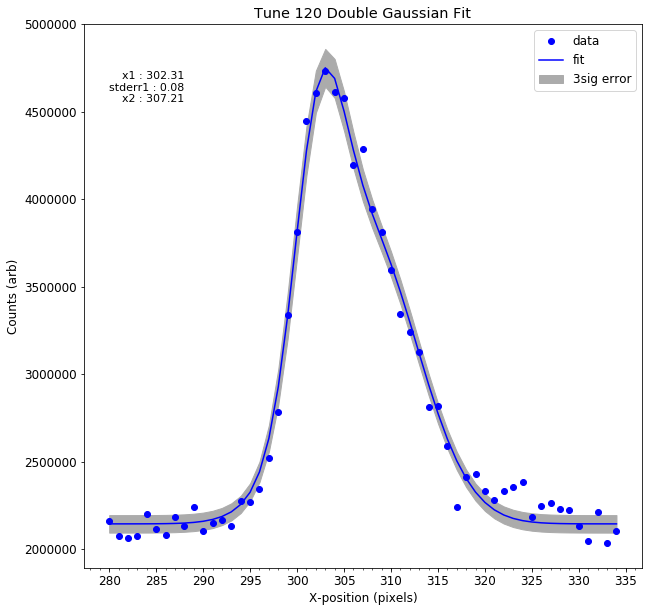

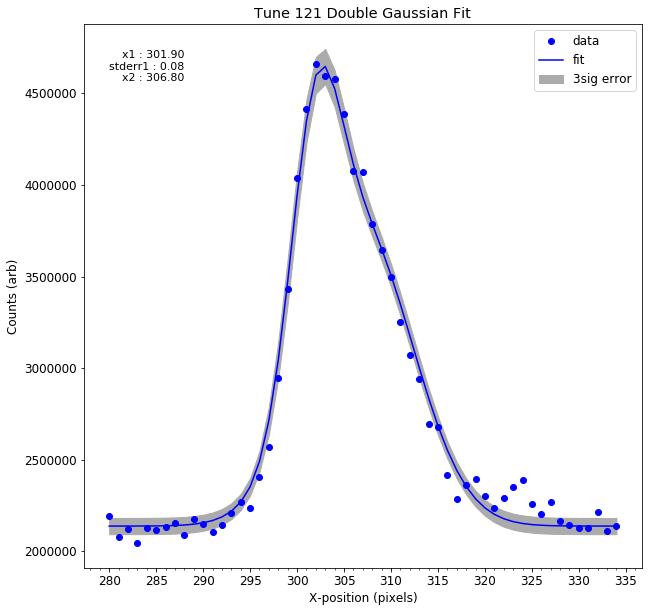

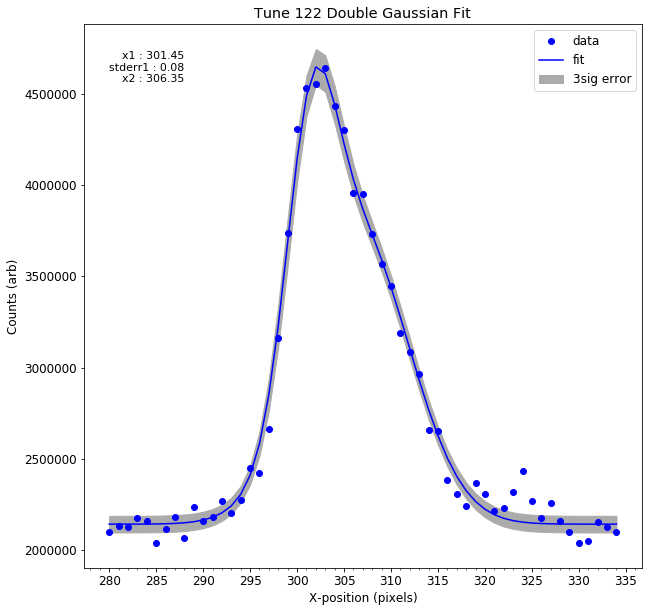

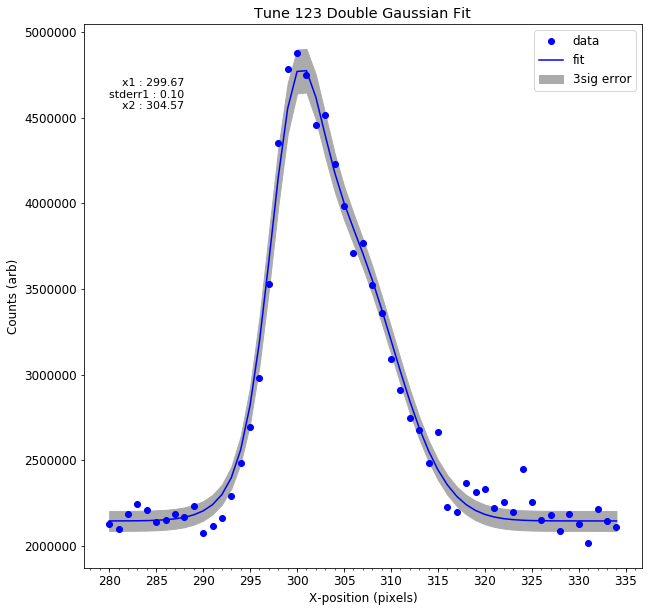

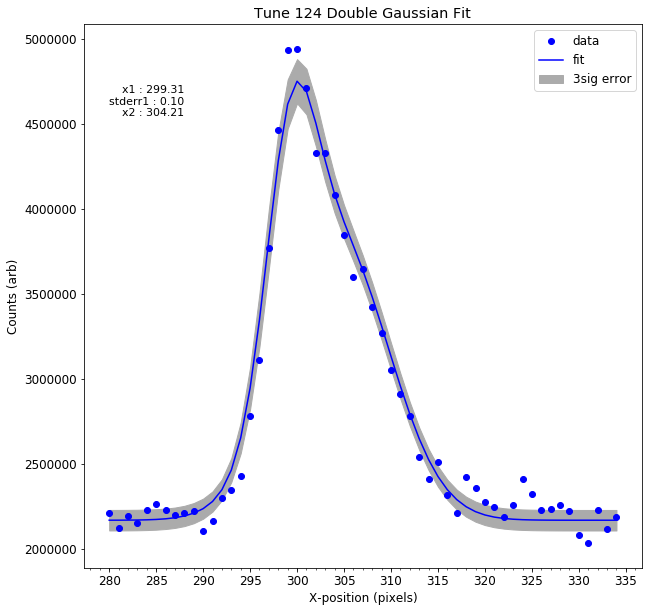

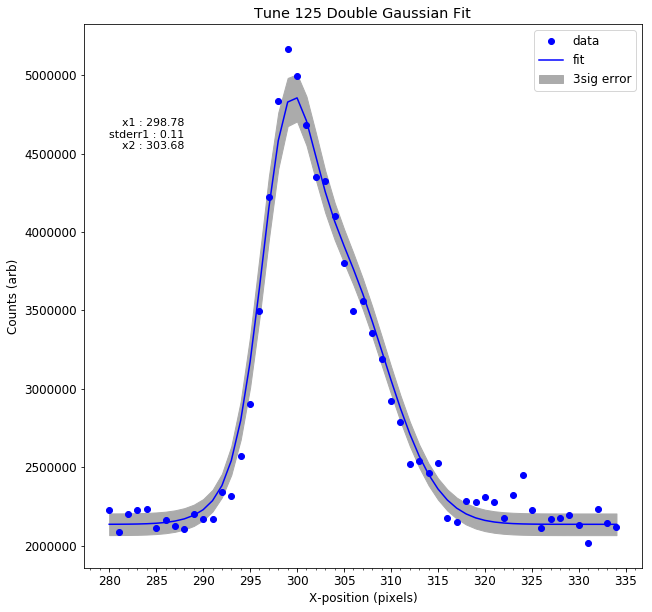

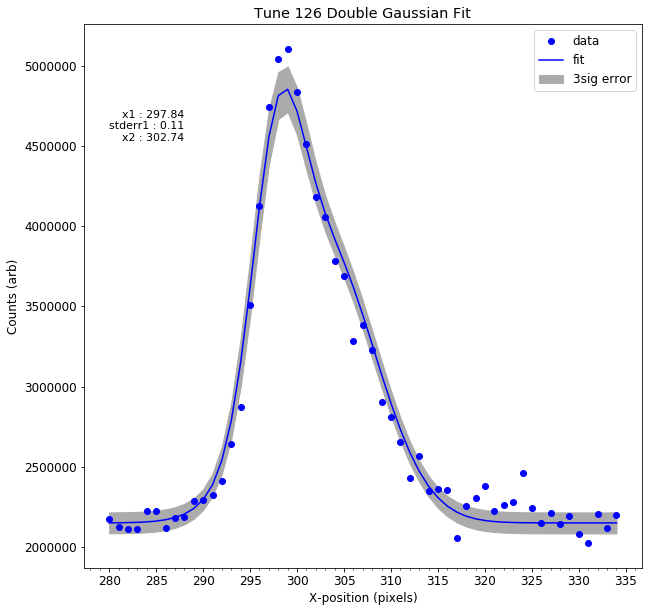

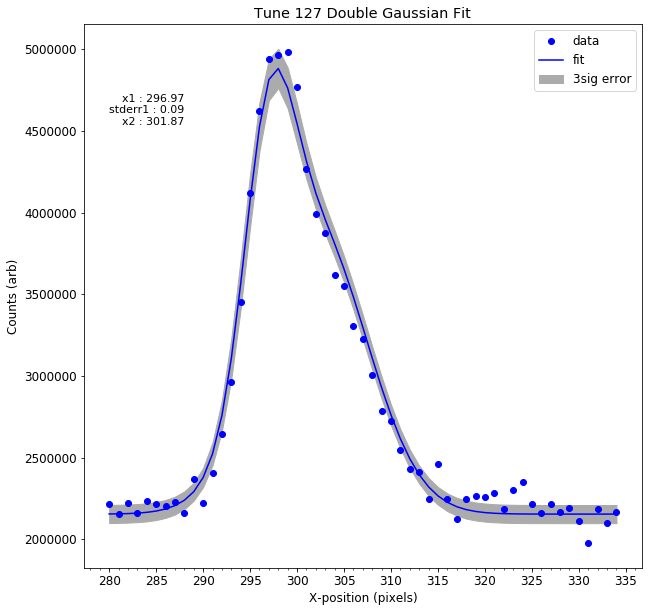

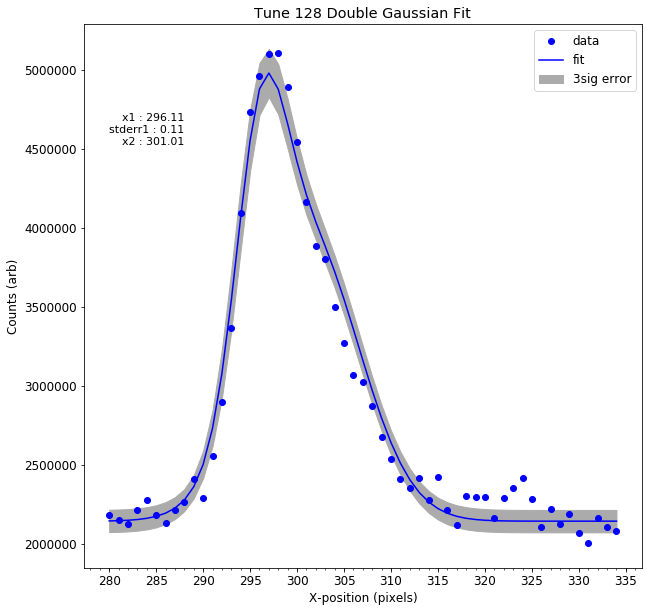

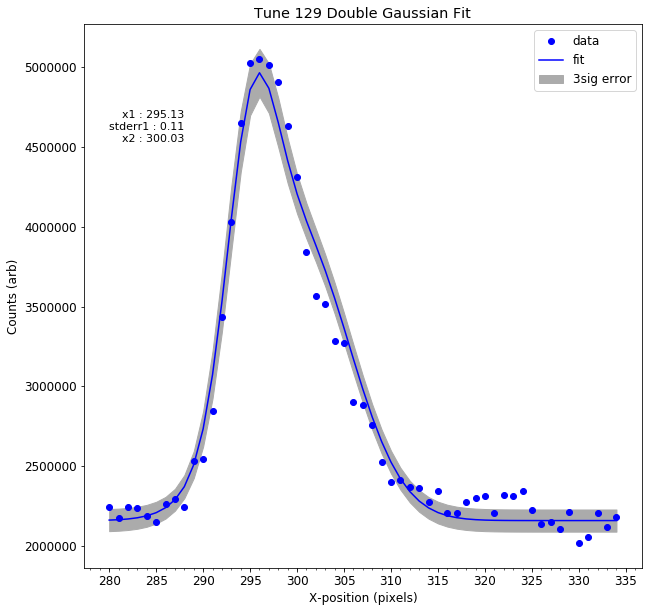

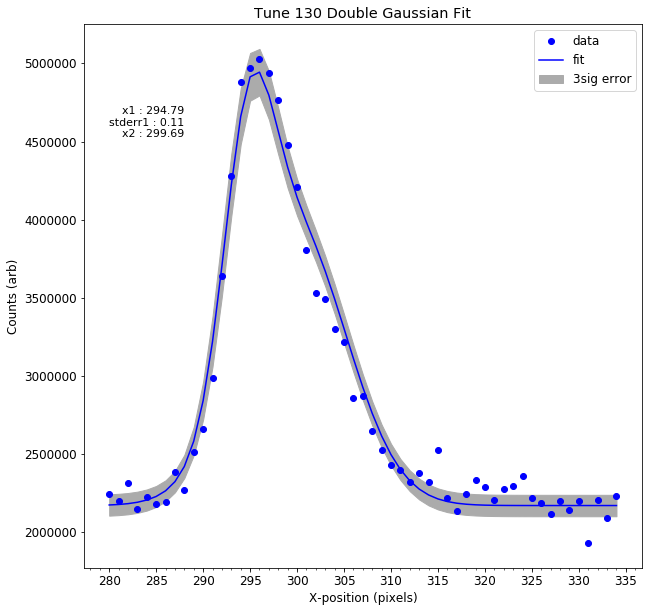

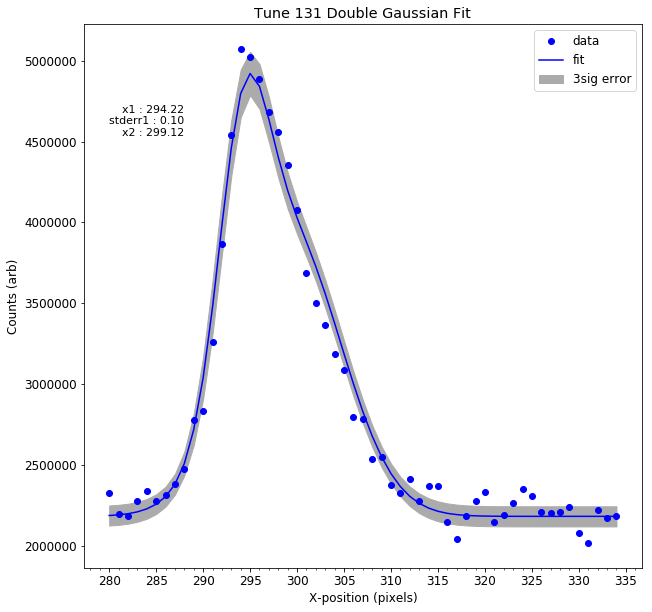

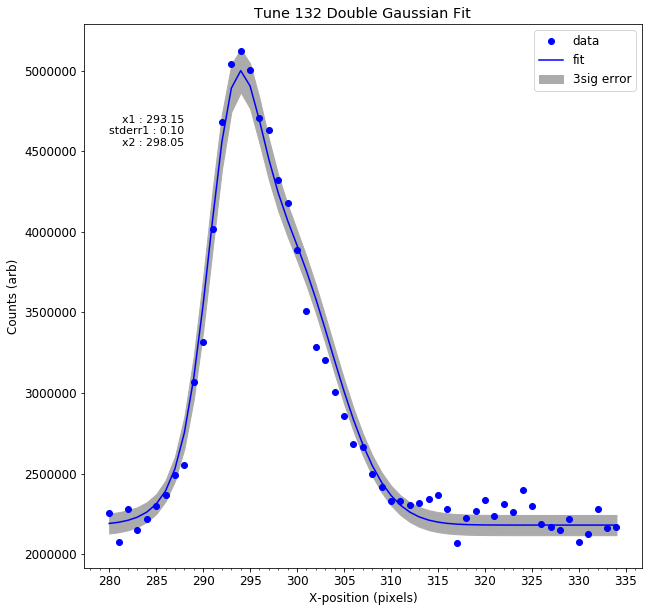

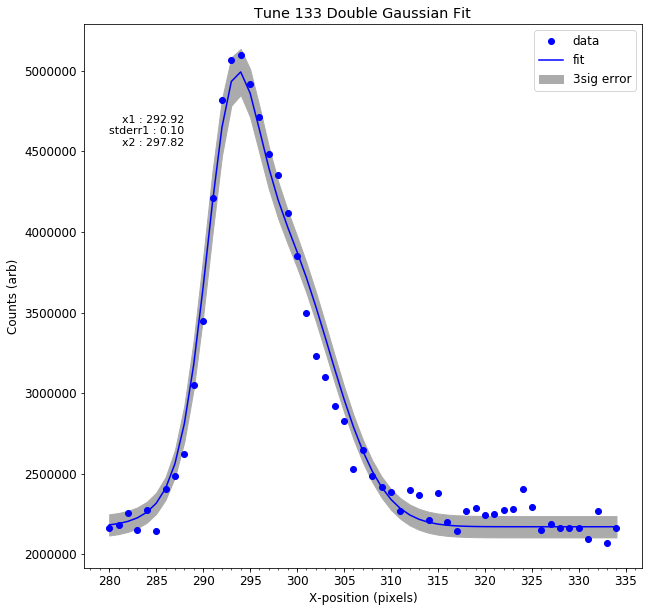

In [76]:
#out_pdf = 'home/sara/Documents/tuneFits.pdf'
#change input image for run
pdf = matplotlib.backends.backend_pdf.PdfPages("output.pdf")

#pdf = matplotlib.backends.backend_pdf.PdfPages(out_pdf)
cnt = 0
figs = plt.figure()
x1=[0 in range(len(n))]  
stderr1=[0 in range(len(n))]    

for i in range(len(n)):
    print(nn[i])
    plot_num = 541
    fig = plt.figure(figsize=(10,10))
    plt.subplot(plot_num)
    plt.rcParams.update({'font.size': 12})
    fg=n[i]
    
    #selective background subtraction
    nx, ny = 371,630
    x = np.arange(nx)
    y = np.arange(ny)

    for i in range(nx):
        for j in range (ny):
            if ((fg[i][j]>bg[i][j]).all() and (bg[i][j]>=0).all() and (fg[i][j]>=0).all()):
                    fg[i][j]= fg[i][j]-bg[i][j]
            else:
                fg[i][j]=0
    z=fg

    ############################### PROFILE INTEGRATION AND GAUSSIAN PLOT ######################################## 
    profile= [0 in range (630)]
    #def integrand(y,i):
     #   return int(z[i,y])
    sum=0
    for i in range(630): #loop over all x
        sum=0
        for j in range(371): #loop over all y for each x: gives one number
            sum=sum+z[j,i]
        profile.append(sum)
    
    
    x = np.arange(630)    
    profile=profile[280:335]   
    x=x[280:335]

    gmod = Model(double_gaussian)
    result = gmod.fit(profile,x=x, c1=5000000, mu1=300,offset=2100000)
    #print(result.fit_report())
    x1.append(result.params['mu1'].value)
    stderr1.append(result.params['mu1'].stderr)
    
    dely = result.eval_uncertainty(sigma=3)
    ax=plt.axes()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
    plt.text(288,4800000, """
x1 : %.2f
stderr1 : %.2f
x2 : %.2f""" %(result.params['mu1'].value , result.params['mu1'].stderr,result.params['mu1'].value+4.9),
        fontsize=11, horizontalalignment='right',
        verticalalignment='top',  color="black")
    plt.fill_between(x, result.best_fit-dely, result.best_fit+dely, color="#ABABAB",label='3sig error')
    
    
    plt.plot(x, profile,         'bo', label='data')
    plt.plot(x, result.best_fit, 'b-',label='fit')
    
    plt.xlabel('X-position (pixels)')
    plt.ylabel('Counts (arb)')
    plt.title('Tune %d Double Gaussian Fit' %(nn[cnt]))
    plt.legend(loc="upper right")
    # change font size
    plot_num += 1
    pdf.savefig(fig)
    cnt += 1
    
    gaussian=result.best_fit-result.params['offset'].value 
    partialI=0
    sumInt=0
    sumP=[ 0 in range (55)]
    #for i in range(630):
    #   partialI=partialI+gaussian[i]
    #  sumP.append(partialI/sumInt*100)


    for i in range(55):
        sumInt=sumInt+gaussian[i]

        #sumInt=sumInt-2100000*630
        #profile[:]=[x-2100000 for x in profile]

    for i in range(55):
        partialI=partialI+gaussian[i]
        sumP.append(partialI/sumInt)
        if ((partialI/sumInt)*100>45 and (partialI/sumInt*100)<55):
            print("Pixel ",i+280," is at ",partialI/sumInt*100,"% of data")
pdf.close()

In [73]:
centroid_05=[309,308,308.5,306.5,306.5,306.5,305,304.5,304,304,302,301.5,300,299.5,298.5,297.5,297,296.5,295.5,295]
centroid_05_=[309,308,308.5,306.5,306.5,305,304.5,304,304,302,301.5,301,300,299.5,298.5,297.5,297,296.5,295.5,295]


In [50]:
print(x1,stderr1)

[True, 306.39719746420019, 305.86814167404304, 306.03549187239628, 304.2251683464342, 304.19049042814612, 302.53589597162983, 302.31433695354201, 301.8953015241824, 301.44594582024325, 299.67251388818875, 299.3108406428284, 298.77911083137928, 297.84061084489326, 296.97407716548145, 296.1057788316437, 295.13158944387612, 294.79190787223905, 294.22227501085871, 293.14685112350446, 292.92397163081307] [True, 0.095733133858977595, 0.087488808154283046, 0.092757638714504584, 0.099608333731256743, 0.097571366986687044, 0.089053520541766601, 0.083914271491833767, 0.077193963256203119, 0.079402975074007121, 0.09618030661908733, 0.10222070915892392, 0.11066734953488849, 0.10565632901883586, 0.089034151873872994, 0.1094106161473825, 0.10824897766940371, 0.10767111227579634, 0.099418334113674525, 0.097324171204549628, 0.1023339638720447]


In [73]:
x1=[306.39719746420019, 305.86814167404304, 306.03549187239628, 304.2251683464342, 304.19049042814612, 302.53589597162983, 302.31433695354201, 301.8953015241824, 301.44594582024325, 299.67251388818875, 299.3108406428284, 298.77911083137928, 297.84061084489326, 296.97407716548145, 296.1057788316437, 295.13158944387612, 294.79190787223905, 294.22227501085871, 293.14685112350446, 292.92397163081307]
stderr1=[0.095733133858977595, 0.087488808154283046, 0.092757638714504584, 0.099608333731256743, 0.097571366986687044, 0.089053520541766601, 0.083914271491833767, 0.077193963256203119, 0.079402975074007121, 0.09618030661908733, 0.10222070915892392, 0.11066734953488849, 0.10565632901883586, 0.089034151873872994, 0.1094106161473825, 0.10824897766940371, 0.10767111227579634, 0.099418334113674525, 0.097324171204549628, 0.1023339638720447]
print(len(stderr1))
stderr_c=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
mid_c=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(x1)):
    stderr_c[i]=np.sqrt((3*stderr1[i])**2+(0.5)**2)
    mid_c[i]=(2*x1[i]+4.9)/2
print(x1,mid_c,stderr_c)

20
[306.3971974642002, 305.86814167404304, 306.0354918723963, 304.2251683464342, 304.1904904281461, 302.5358959716298, 302.314336953542, 301.8953015241824, 301.44594582024325, 299.67251388818875, 299.3108406428284, 298.7791108313793, 297.84061084489326, 296.97407716548145, 296.1057788316437, 295.1315894438761, 294.79190787223905, 294.2222750108587, 293.14685112350446, 292.92397163081307] [308.8471974642002, 308.31814167404303, 308.48549187239627, 306.6751683464342, 306.6404904281461, 304.9858959716298, 304.764336953542, 304.3453015241824, 303.89594582024324, 302.12251388818873, 301.7608406428284, 301.2291108313793, 300.29061084489325, 299.42407716548144, 298.5557788316437, 297.5815894438761, 297.24190787223904, 296.6722750108587, 295.59685112350445, 295.37397163081306] [0.57661381900380115, 0.56470224363846167, 0.57222007642079031, 0.58249152898429069, 0.57938031110908217, 0.56689925532491714, 0.55979857506075048, 0.55102647093293111, 0.55384428502552097, 0.57728317352238401, 0.5865506

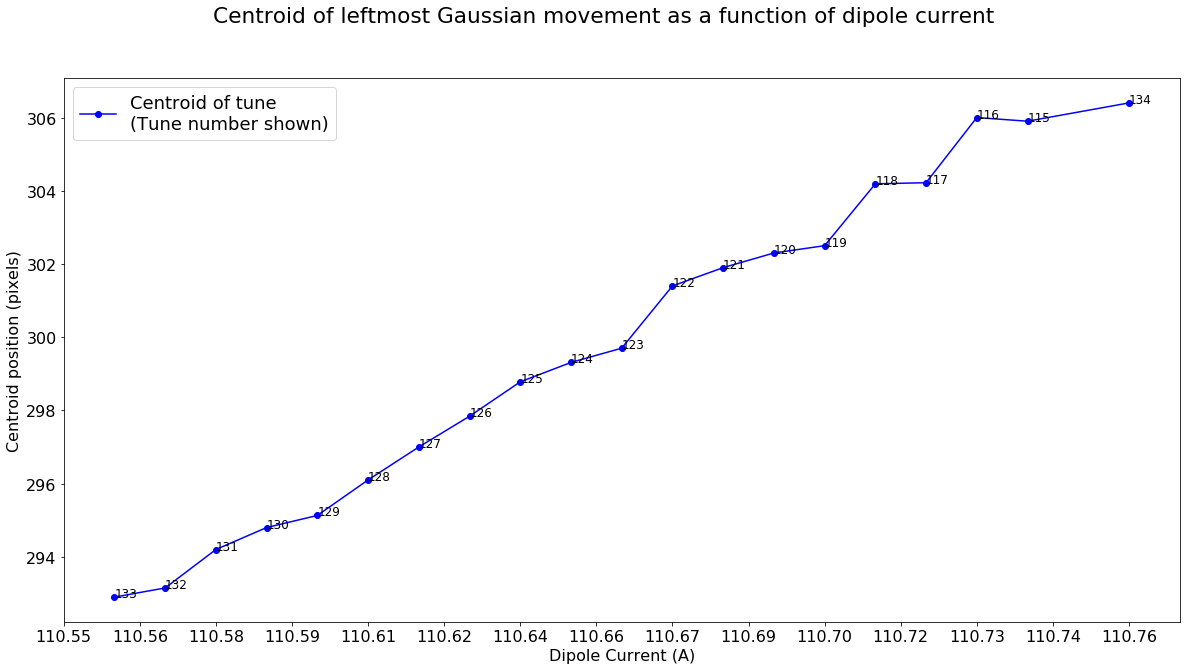

In [75]:
centroid=[306.4,305.9,306,304.22,304.19,302.5,302.3,301.9,301.4,299.7,299.31,298.78,297.84,297,296.1,295.13,294.8,294.2,293.15
,292.9]
y=[1,1,1,1,1,1,1,1,1,1,1]
n=[134,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133]
current=[ 110.76 ,110.74 , 110.73,  110.72 , 110.71 , 110.7 ,  \
         110.69  ,110.68 ,110.67 , 110.66 ,110.65,110.64,110.63,110.62,110.61,110.60,110.59,110.58,110.57 , 110.56]




ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.015))

for i, txt in enumerate(n):
    plt.annotate(txt, (current[i], centroid[i]), fontsize=12)
    
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%0.2f'))
plt.plot(current,centroid, c='b', marker='o', label='Centroid of tune \n(Tune number shown)' )

plt.rcParams['figure.figsize'] = 20,10


plt.rcParams.update({'font.size': 18})
plt.suptitle('Centroid of leftmost Gaussian movement as a function of dipole current')
plt.xlabel('Dipole Current (A)')
plt.ylabel('Centroid position (pixels)')
plt.legend(loc="upper left")
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = 20,10
#plt.savefig("BCMctr_Dcurrent.pdf")
plt.show()
